In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [168]:
data = pd.read_csv('Student_Insomnia.csv')
# remove the timestamp column
data = data.drop('Timestamp',axis=1)
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 15 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                   --------------  ----- 
 0   1. What is your year of study?                                                                                           791 non-null    object
 1   2. What is your gender?                                                                                                  791 non-null    object
 2   3. How often do you have difficulty falling asleep at night?                                                             791 non-null    object
 3   4. On average, how many hours of sleep do you get on a typical day?                                                      791 non-null    object
 

,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average


In [169]:
# 1. Year of study
def year_study(time):
    if time == 'Graduate student':
        return 5
    elif time == 'First year':
        return 1
    elif time == 'Second year':
        return 2
    elif time == 'Third year':
        return 3
    elif time == 'Fourth year':
        return 4
    else:   
        raise ValueError('Unknown year value')
    
# 2. Gender
def gender(time):
    if time == 'Male':
        return 1
    elif time == 'Female':
        return 2
    else:
        raise ValueError('Unknown gender value')

# 3. Difficulty falling asleep (using frequency categories)
def difficulty(time):
    if time == 'Every night':
        return 1
    elif time == 'Often (5-6 times a week)':
        return 2
    elif time == 'Sometimes (3-4 times a week)':
        return 3
    elif time == 'Rarely (1-2 times a week)':
        return 4
    elif time == 'Never':
        return 5
    else:
        print(time)
        raise ValueError('Unknown difficulty value')

# 4. Hours of sleep on a typical day
def hours_of_sleep(time):
    if time == 'More than 8 hours':
        return 6
    elif time == '7-8 hours':
        return 5
    elif time == '6-7 hours':
        return 4
    elif time == '5-6 hours':
        return 3
    elif time == '4-5 hours':
        return 2
    elif time == 'Less than 4 hours':
        return 1
    else:
        raise ValueError('Unknown hours of sleep value')

# 5. Waking up during the night and trouble falling back asleep
def night_wake(time):
    if time == 'Often (5-6 times a week)':
        return 1
    elif time == 'Sometimes (3-4 times a week)':
        return 2
    elif time == 'Every night':
        return 3
    elif time == 'Rarely (1-2 times a week)':
        return 4
    elif time == 'Never':
        return 5
    else:
        raise ValueError('Unknown night wake value')

# 6. Overall quality of sleep
def sleep_quality(time):
    if time == 'Very poor':
        return 1
    elif time == 'Poor':
        return 2
    elif time == 'Average':
        return 3
    elif time == 'Good':
        return 4
    elif time == 'Very good':
        return 5
    else:
        raise ValueError('Unknown sleep quality value')

# 7. Difficulty concentrating due to lack of sleep
def concentration_difficulty(time):
    if time == 'Never':
        return 5
    elif time == 'Rarely':
        return 4
    elif time == 'Sometimes':
        return 3
    elif time == 'Often':
        return 2
    elif time == 'Always':
        return 1
    else:
        raise ValueError('Unknown concentration difficulty value')

# 8. Fatigue during the day
def fatigue(text):
    # Extract the first word to determine frequency
    freq = text.split()[0]
    mapping = {'Never': 5, 'Rarely': 4, 'Sometimes': 3, 'Often': 2, 'Always': 1}
    if freq in mapping:
        return mapping[freq]
    else:
        raise ValueError('Unknown fatigue frequency value')

# 9. Missing/skipping classes due to sleep issues
def miss_class(text):
    freq = text.split()[0]
    mapping = {'Never': 5, 'Rarely': 4, 'Sometimes': 3, 'Often': 2, 'Always': 1}
    if freq in mapping:
        return mapping[freq]
    else:
        raise ValueError('Unknown miss class frequency value')

# 10. Impact of insufficient sleep on assignments/deadlines
def assignment_impact(text):
    if text == 'No impact':
        return 5
    elif text == 'Minor impact':
        return 4
    elif text == 'Moderate impact':
        return 3
    elif text == 'Major impact':
        return 2
    elif text == 'Severe impact':   
        return 1
    else:
        raise ValueError('Unknown assignment impact value')

# 11. Use of electronic devices before sleep
def device_use(time):
    if time == 'Every night':
        return 1
    elif time == 'Often (5-6 times a week)':
        return 2
    elif time == 'Sometimes (3-4 times a week)':
        return 3
    elif time == 'Rarely (1-2 times a week)':
        return 4
    elif time == 'Never':
        return 5
    else:
        raise ValueError('Unknown device use frequency value')

# 12. Caffeine consumption to stay awake
def caffeine_consumption(time):
    if time == 'Every day':
        return 1
    elif time == 'Often (5-6 times a week)':
        return 2
    elif time == 'Sometimes (3-4 times a week)':
        return 3
    elif time == 'Rarely (1-2 times a week)':
        return 4
    elif time == 'Never':
        return 5
    else:
        raise ValueError('Unknown caffeine consumption value')

# 13. Frequency of physical activity/exercise
def exercise_freq(time):
    if time == 'Every day':
        return 5
    elif time == 'Often (5-6 times a week)':
        return 4
    elif time == 'Sometimes (3-4 times a week)':
        return 3
    elif time == 'Rarely (1-2 times a week)':
        return 2
    elif time == 'Never':
        return 1
    else:
        raise ValueError('Unknown exercise frequency value')

# 14. Stress levels related to academic workload
def stress_levels(text):
    if text == 'No stress':
        return 4
    elif text == 'Low stress':
        return 3
    elif text == 'High stress':
        return 2
    elif text == 'Extremely high stress':
        return 1
    else:
        raise ValueError('Unknown stress level value')

# 15. Overall academic performance
def academic_performance(text):
    if text == 'Poor':
        return 1
    if text == 'Below Average':
        return 2
    elif text == 'Average':
        return 3
    elif text == 'Good':
        return 4
    elif text == 'Excellent':
        return 5
    else:
        raise ValueError('Unknown academic performance value')

# Applying the functions to the DataFrame (assumes your DataFrame is named 'data')
data['Year_Study'] = data['1. What is your year of study?'].apply(year_study)
data['Gender'] = data['2. What is your gender?'].apply(gender)
data['Sleep_Difficulty'] = data['3. How often do you have difficulty falling asleep at night? '].apply(difficulty)
data['Hours_of_Sleep'] = data['4. On average, how many hours of sleep do you get on a typical day?'].apply(hours_of_sleep)
data['Night_Wake'] = data['5. How often do you wake up during the night and have trouble falling back asleep?'].apply(night_wake)
data['Sleep_Quality'] = data['6. How would you rate the overall quality of your sleep?'].apply(sleep_quality)
data['Concentration_Difficulty'] = data['7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?'].apply(concentration_difficulty)
data['Fatigue'] = data['8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?'].apply(fatigue)
data['Missed_Classes'] = data['9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?'].apply(miss_class)
data['Assignment_Impact'] = data['10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?'].apply(assignment_impact)
data['Device_Use'] = data['11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?'].apply(device_use)
data['Caffeine_Consumption'] = data['12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?'].apply(caffeine_consumption)
data['Exercise_Frequency'] = data['13. How often do you engage in physical activity or exercise?'].apply(exercise_freq)
data['Stress_Levels'] = data['14. How would you describe your stress levels related to academic workload?'].apply(stress_levels)
data['Academic_Performance'] = data['15. How would you rate your overall academic performance (GPA or grades) in the past semester?'].apply(academic_performance)


# Drop the original columns
data = data.drop(['1. What is your year of study?', '2. What is your gender?',
                  '3. How often do you have difficulty falling asleep at night? ',
                  '4. On average, how many hours of sleep do you get on a typical day?',
                  '5. How often do you wake up during the night and have trouble falling back asleep?',
                  '6. How would you rate the overall quality of your sleep?',
                  '7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?',
                  '8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?',
                  '9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?',
                  '10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?',
                  '11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?',
                  '12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?',
                  '13. How often do you engage in physical activity or exercise?',
                  '14. How would you describe your stress levels related to academic workload?',
                  '15. How would you rate your overall academic performance (GPA or grades) in the past semester?'], axis=1)


<Axes: >

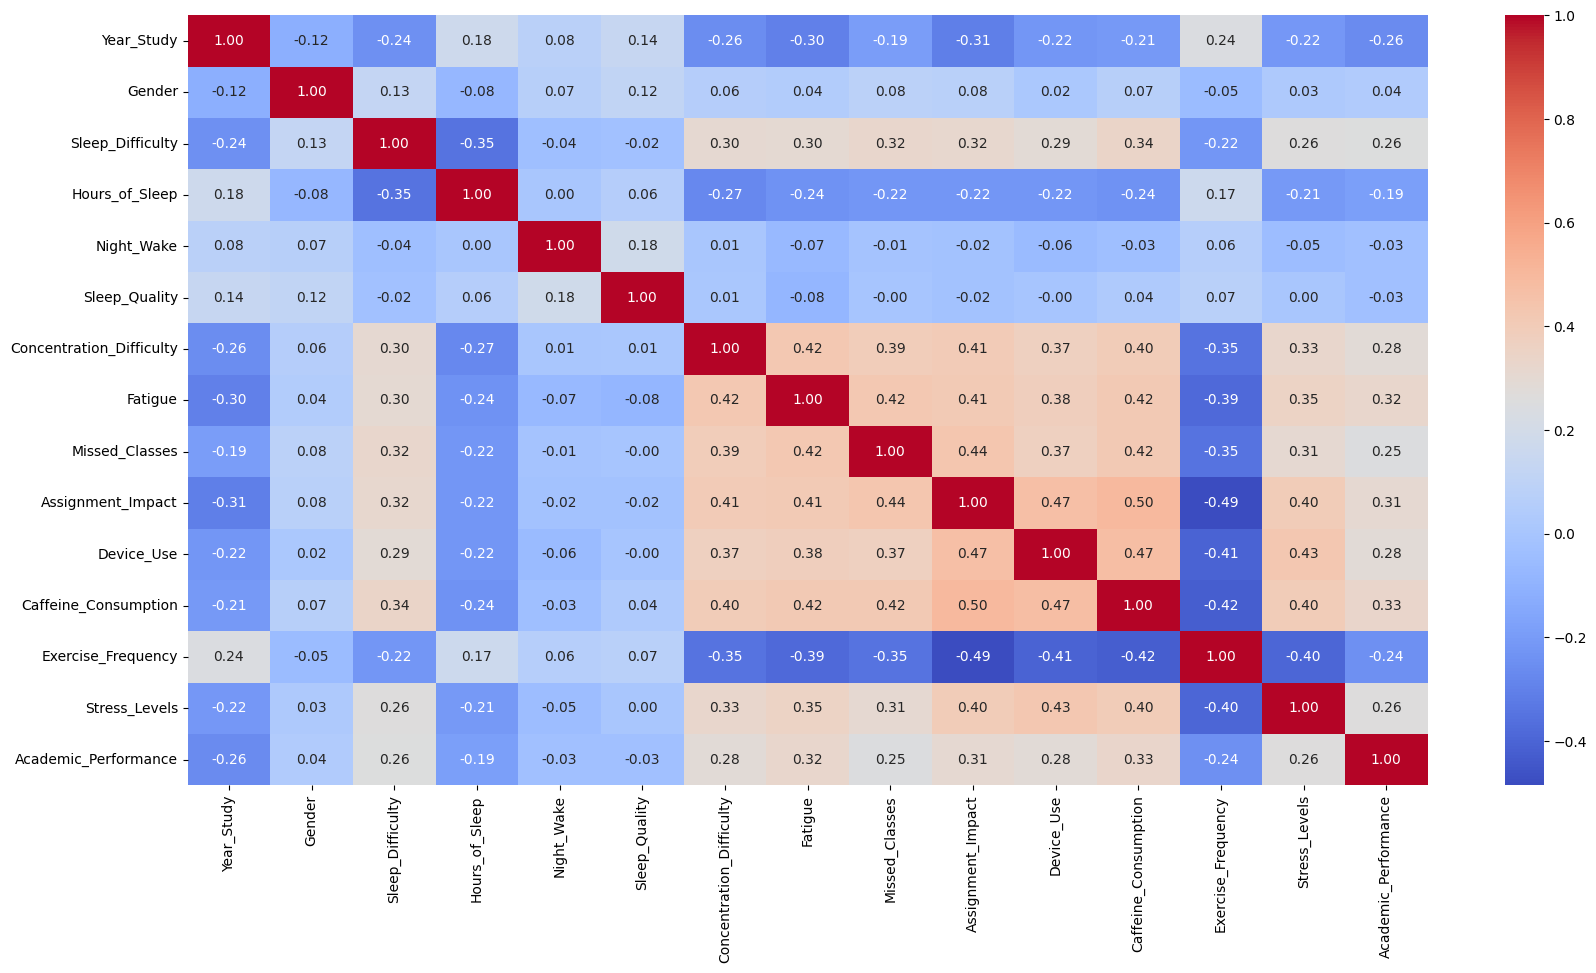

In [170]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [171]:
discrete_feat = ['Year_Study', 'Gender', 'Sleep_Difficulty', 'Hours_of_Sleep', 'Night_Wake', 'Concentration_Difficulty', 'Fatigue', 'Missed_Classes', 'Assignment_Impact', 'Device_Use', 'Caffeine_Consumption', 'Exercise_Frequency', 'Stress_Levels', 'Academic_Performance']
continuous_feat = [col for col in data.select_dtypes(exclude='O') if col not in ['Sleep_Quality']+discrete_feat] 
# discrete_feat = ['Age', 'Gender', 'University_Year', 'Caffeine_Intake','Weekday_Sleep_Start_Period', 'Weekend_Sleep_Start_Period', 'Weekday_Sleep_End_Period', 'Weekend_Sleep_End_Period']
# continuous_feat = [col for col in data.select_dtypes(exclude='O') if col not in ['Sleep_Quality']+discrete_feat]

print('Discrete Features:',discrete_feat)
print('Continuous Features:',continuous_feat)

Discrete Features: ['Year_Study', 'Gender', 'Sleep_Difficulty', 'Hours_of_Sleep', 'Night_Wake', 'Concentration_Difficulty', 'Fatigue', 'Missed_Classes', 'Assignment_Impact', 'Device_Use', 'Caffeine_Consumption', 'Exercise_Frequency', 'Stress_Levels', 'Academic_Performance']
Continuous Features: []


### Discrete Analysis

In [172]:
# import scipy.stats as stats 

# for feat in discrete_feat:
#     groups = data.groupby(feat)['Hours_of_Sleep'].apply(list)
#     if len(groups)>1:
#         _, p_value = stats.kruskal(*groups)
#     else:
#         p_value = 0.0
    
#     plt.figure(figsize=(12,4))
#     plt.subplot(121)
#     crosstab = data.groupby(['Hours_of_Sleep',feat]).size().unstack()
#     crosstab.plot(kind='bar',stacked=True,cmap='rocket',ax=plt.gca())
#     plt.box(False)

#     plt.subplot(122)
#     sns.lineplot(data=data.groupby(feat)['Hours_of_Sleep'].mean(),color='tomato',linewidth=3,marker='o',markersize=10)
#     plt.box(False)
    
#     plt.suptitle(f'Sleep Quality by {feat} [P Value :{p_value:0.2f}]')
#     plt.tight_layout()
#     plt.show()

## Permutation Importance 

In [173]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.inspection import permutation_importance

# X, y = data.drop('Academic_Performance',axis=1),data['Academic_Performance']


# model = RandomForestRegressor(n_estimators=1000,random_state=123)
# model.fit(X,y)

# results = permutation_importance(model, X, y,random_state=123)

# imp_df = pd.DataFrame({
#     'Importance': results.importances_mean
# },index=X.columns).sort_values(by='Importance',ascending=False)
# sns.barplot(data=imp_df,x='Importance',y=imp_df.index,palette='viridis')

In [174]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.inspection import permutation_importance
# data_sleep_hour = data.copy()
# rm = ['Sleep_Difficulty', 'Sleep_Quality','Academic_Performance', 'Concentration_Difficulty', 'Fatigue', 'Missed_Classes', 'Assignment_Impact', 'Gender']
# for rem in rm:
#     data_sleep_hour = data_sleep_hour.drop(rem,axis=1)
# X, y = data_sleep_hour.drop('Hours_of_Sleep',axis=1),data_sleep_hour['Hours_of_Sleep']


# model = RandomForestRegressor(n_estimators=1000,random_state=123)
# model.fit(X,y)

# results = permutation_importance(model, X, y,random_state=123)

# imp_df = pd.DataFrame({
#     'Importance': results.importances_mean
# },index=X.columns).sort_values(by='Importance',ascending=False)
# sns.barplot(data=imp_df,x='Importance',y=imp_df.index,palette='viridis')
# # title = 'Feature Importance'

In [175]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.inspection import permutation_importance

# data_sleep_diff = data.copy()
# rm = ['Hours_of_Sleep', 'Sleep_Quality','Academic_Performance', 'Concentration_Difficulty', 'Fatigue', 'Missed_Classes', 'Assignment_Impact', 'Gender']
# for rem in rm:
#     data_sleep_diff = data_sleep_diff.drop(rem,axis=1)
    
# X, y = data_sleep_diff.drop('Sleep_Difficulty',axis=1),data_sleep_diff['Sleep_Difficulty']


# model = RandomForestRegressor(n_estimators=1000,random_state=123)
# model.fit(X,y)

# results = permutation_importance(model, X, y,random_state=123)

# imp_df = pd.DataFrame({
#     'Importance': results.importances_mean
# },index=X.columns).sort_values(by='Importance',ascending=False)
# sns.barplot(data=imp_df,x='Importance',y=imp_df.index,palette='viridis')

In [176]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.inspection import permutation_importance

# data_sleep_diff = data.copy()
# rm = ['Hours_of_Sleep', 'Sleep_Quality','Academic_Performance', 'Concentration_Difficulty', 'Fatigue', 'Missed_Classes', 'Assignment_Impact', 'Gender']
# for rem in rm:
#     data_sleep_diff = data_sleep_diff.drop(rem,axis=1)
    
# X, y = data_sleep_diff.drop('Sleep_Difficulty',axis=1),data_sleep_diff['Sleep_Difficulty']


# model = RandomForestRegressor(n_estimators=1000,random_state=123)
# model.fit(X,y)

# results = permutation_importance(model, X, y,random_state=123)

# imp_df = pd.DataFrame({
#     'Importance': results.importances_mean
# },index=X.columns).sort_values(by='Importance',ascending=False)
# sns.barplot(data=imp_df,x='Importance',y=imp_df.index,palette='viridis')

## Stat Analysis

In [177]:
import pingouin as pg
import semopy

# remove the timestamp column
data_med = data.copy()
data_med.columns = data_med.columns.str.strip()

# Define your SEM model as text
model_desc = '''
Sleep_Difficulty ~ Device_Use
Fatigue ~ Sleep_Difficulty
Academic_Performance ~ Fatigue
'''

# Fit the model
model = semopy.Model(model_desc)
results = model.fit(data_med)

# Inspect results
semopy.report(model, 'reports')


In [178]:

# Load an example dataset comparing pain threshold as a function of hair color
# df = pg.read_dataset('anova')

# There are 4 independent groups in our dataset, we'll therefore use the Kruskal-Wallis test:
pg.kruskal(data=data_med, dv='Sleep_Difficulty', between='Device_Use')

,Source,ddof1,H,p-unc
Kruskal,Device_Use,4,59.121012,4.438088e-12


,n,r,CI95%,p-val,BF10,power
pearson,791,0.291296,"[0.23, 0.35]",6.184411e-17,6.345e+13,1.0


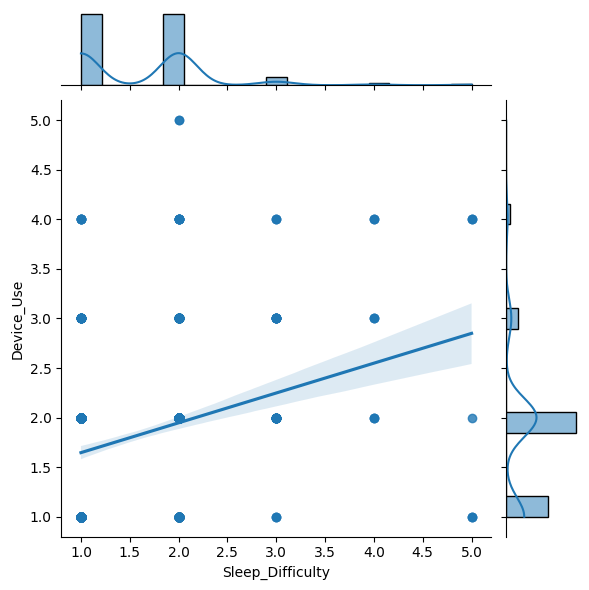

In [179]:

# Load an example dataset with the personality scores of 500 participants
df = data_med

# 1.Test for bivariate normality (optional)
pg.multivariate_normality(df[['Sleep_Difficulty', 'Device_Use']])

# 1bis. Visual inspection with a histogram + scatter plot (optional)
sns.jointplot(data=df, x='Sleep_Difficulty', y='Device_Use', kind='reg')

# 2. If the data have a bivariate normal distribution and no clear outlier(s), we can use a regular Pearson correlation
pg.corr(df['Sleep_Difficulty'], df['Device_Use'], method='pearson')

In [181]:
M = ['Caffeine_Consumption', 'Exercise_Frequency', 'Stress_Levels', 'Night_Wake']
X = ['Sleep_Difficulty', 'Hours_of_Sleep']
pg.mediation_analysis(data=data_med, x='Sleep_Difficulty', m=M, y='Academic_Performance', alpha=0.05,
                   seed=42).round(3)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,Caffeine_Consumption ~ X,0.357,0.035,0.000,0.288,0.426,Yes
1,Exercise_Frequency ~ X,-0.236,0.037,0.000,-0.308,-0.163,Yes
2,Stress_Levels ~ X,0.231,0.031,0.000,0.171,0.291,Yes
3,Night_Wake ~ X,-0.053,0.051,0.293,-0.152,0.046,No
4,Y ~ Caffeine_Consumption,0.246,0.039,0.000,0.169,0.324,Yes
5,Y ~ Exercise_Frequency,-0.091,0.039,0.019,-0.167,-0.015,Yes
6,Y ~ Stress_Levels,0.157,0.046,0.001,0.067,0.247,Yes
7,Y ~ Night_Wake,-0.008,0.025,0.762,-0.057,0.042,No
8,Total,0.276,0.037,0.000,0.203,0.349,Yes
9,Direct,0.151,0.038,0.000,0.076,0.226,Yes
